Heuristic ansatze and trade-offs
If you do not have any information about your particular problem that can help restrict the dimensionality, you can try an arbitrary family of parameterized circuits with fewer than 2n   parameters. However, there are some trade-offs to consider:

Speed: By reducing the search space, the algorithm can run faster.
Accuracy: However, reducing the space could risk excluding the actual solution to the problem, leading to suboptimal solutions.
Noise: Deeper circuits are affected by noise, so we need to experiment with our ansatz's connectivity, gates, and gate fidelity.
There is a fundamental trade-off between quality (or even solvability) and speed: the more parameters, the more likely you are to find a precise result, but the longer it will take to run the algorithm.
https://learning.quantum.ibm.com/course/variational-algorithm-design/ansatze-and-variational-forms

In [2]:
from qiskit.circuit.library import NLocal, CCXGate, CRZGate, RXGate
from qiskit.circuit import Parameter

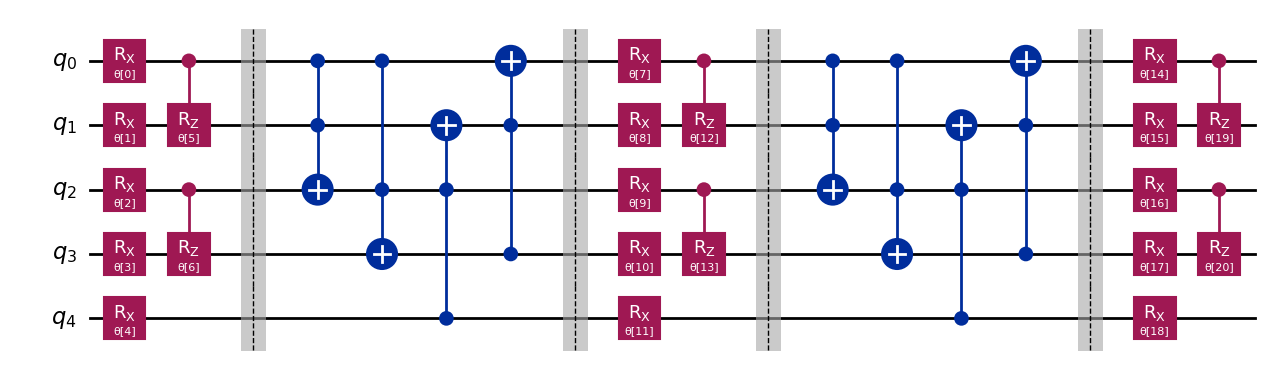

In [5]:
theta = Parameter("θ")
ansatz = NLocal(
    num_qubits=5,
    rotation_blocks=[RXGate(theta), CRZGate(theta)],
    entanglement_blocks=CCXGate(),
    entanglement=[[0, 1, 2], [0, 2, 3], [4, 2, 1], [3, 1, 0]],
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

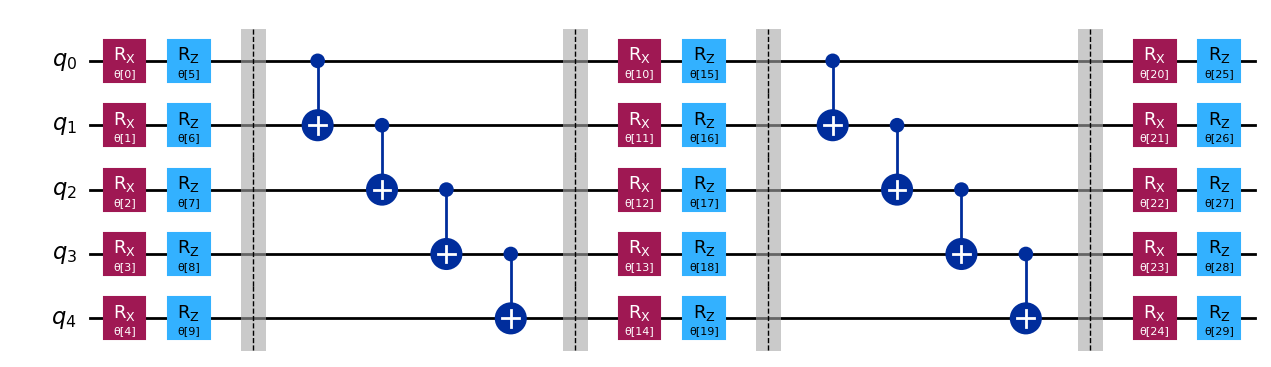

In [6]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(
    num_qubits=5,
    rotation_blocks=["rx", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

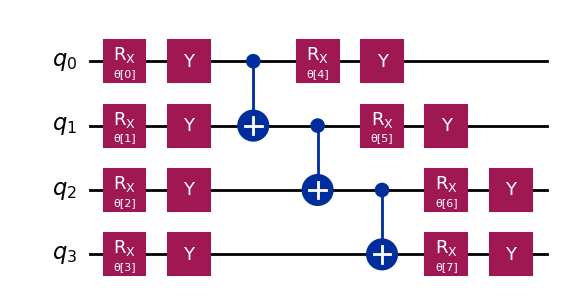

In [7]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")

Problem-specific ansatze

In [8]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

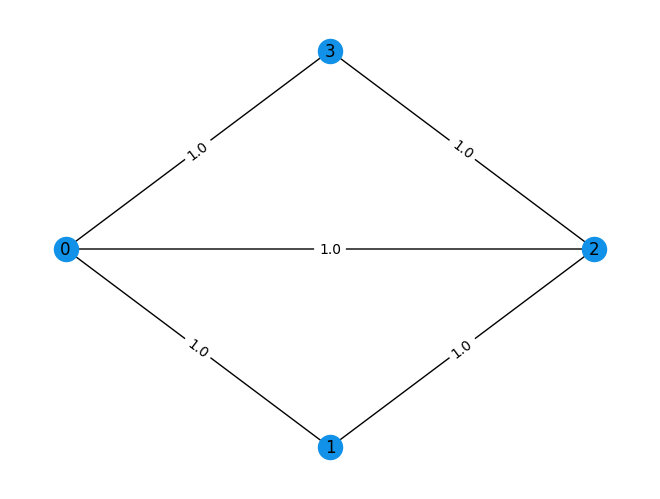

In [10]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

n = 4
G = rx.PyGraph()
G.add_nodes_from(range(n))
# The edge syntax is (start, end, weight)
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
G.add_edges_from(edges)

mpl_draw(G, pos=rx.shell_layout(G), with_labels=True, edge_labels=str, node_color="#1192E8")

In [11]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

#Problem to Hamiltonian Operator

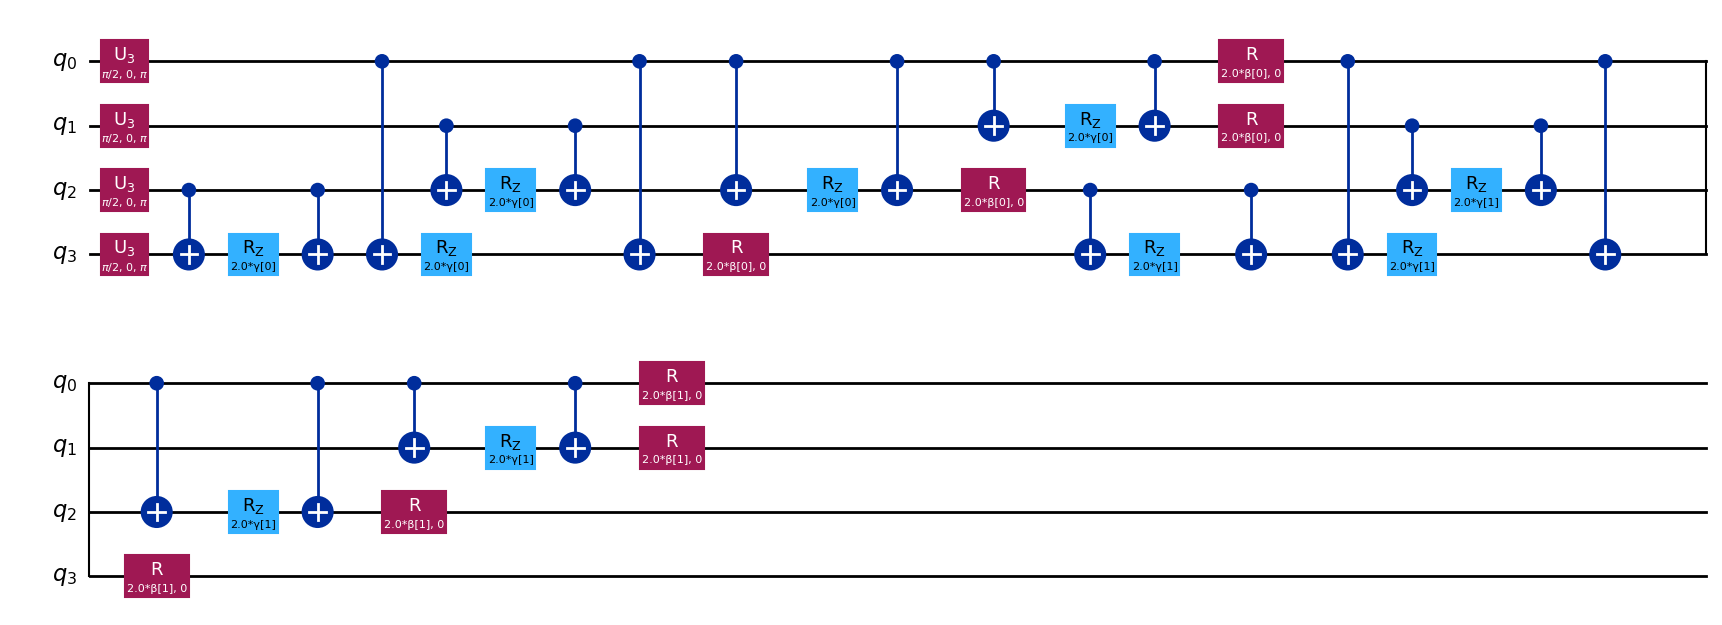

In [14]:
hamiltonian = SparsePauliOp.from_list([("ZZII", 1),("IZZI",1),("ZIIZ",1),("IZIZ",1),("IIZZ",1)])
#QAOA ansatz circuit
ansatz = QAOAAnsatz(hamiltonian, reps=2)
#Draw
ansatz.decompose(reps=3).draw("mpl")

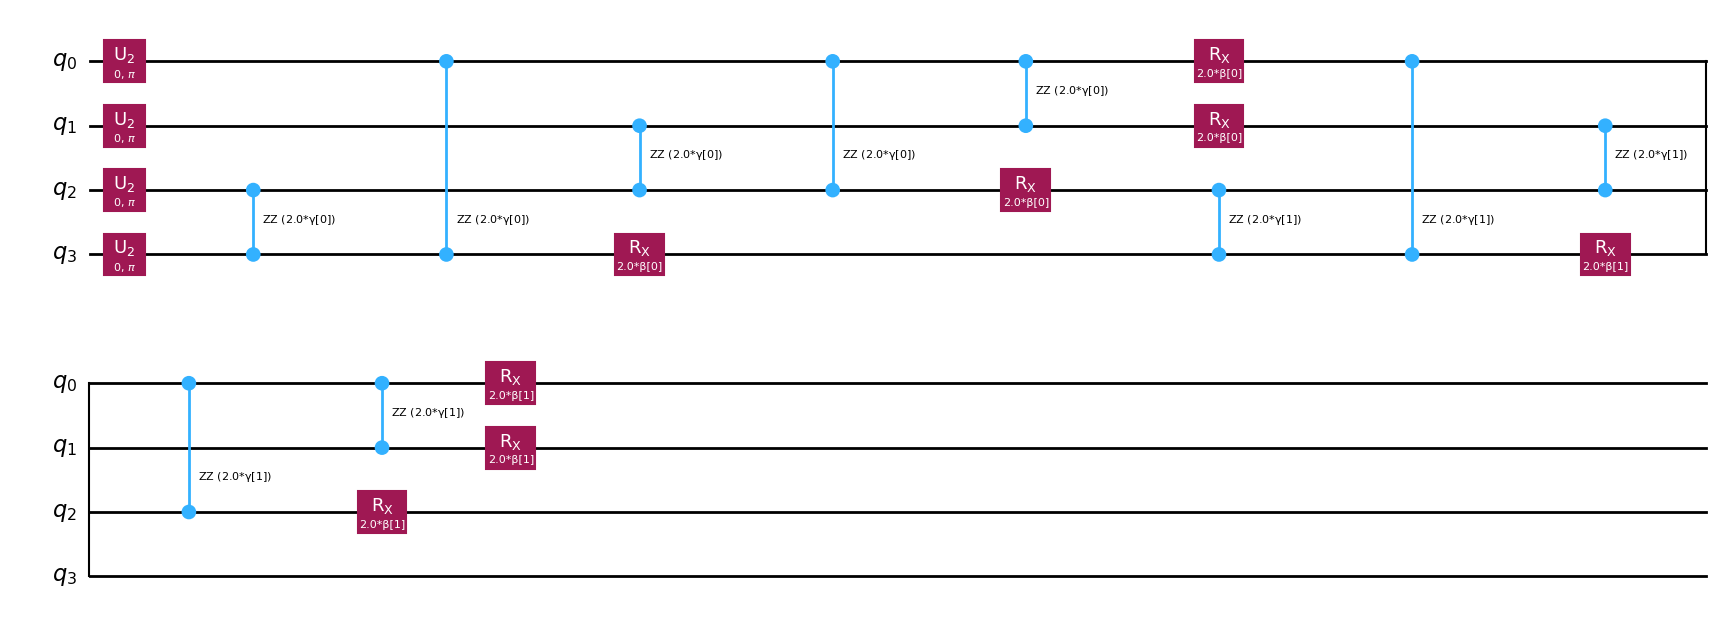

In [15]:
ansatz.decompose(reps=2).draw("mpl")